In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Regression 

Up until this point, we’ve been working with classification models, where we try to determine what​ something is. Now we’re curious about determining a ​specific​ value based on an input. For example, you might want to use a neural network to predict what the temperature will be tomorrow or what the price of a car should be. For a task like this, we need something with a much more granular output. This also means that we require a new way to measure loss, as well as a new output layer activation function! It also means our data are different. We need training data that have target scalar values, not classes.



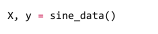
plt.plot(X, y) 
plt.show()

The data above will produce a graph like:

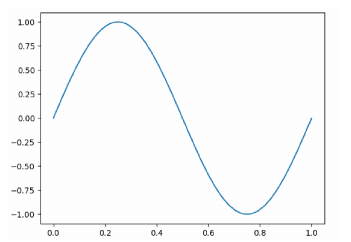

Figure 1:​ The sine data graph.

### Linear Activation 

Since we’re no longer using classification labels and want to predict a scalar value, we’re going to use a linear activation function for the output layer. This linear function does not modify its input and passes it to the output: ​y=x.​ For the backward pass, we already know the derivative of​ f(x)=x is ​1​; thus, the full class for our new linear activation function is:

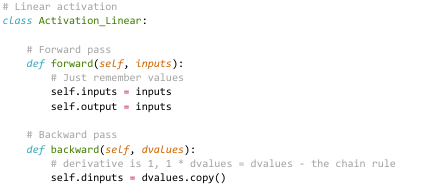

This might raise a question — why do we even write some code that does nothing? We just pass inputs to outputs for the forward pass and do the same with gradients during the backward pass since, to apply the chain rule, we multiply incoming gradients by the derivative, which is ​1.​ We do this only for completeness and clarity to see the activation function of the output layer in the model definition code. From a computational time point of view, this adds almost nothing to the processing time, at least not enough to noticeably impact training times. Now we just need to figure out loss!

### Mean Squared Error Loss 

Since we aren’t working with classification labels anymore, we cannot calculate cross-entropy. Instead, we need some new methods. The two main methods for calculating error in regression are ​mean squared error​ (MSE) and ​mean absolute error​ (MAE). With ​mean squared error​, you square the difference between the predicted and true values of single outputs (as the model can have multiple regression outputs) and average those squared values.

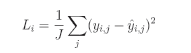

Where ​y​ means the target value, ​y-hat​ means predicted value, index ​i​ means the current sample, index ​j​ means the current output in this sample, and the ​J​ means the number of outputs. The idea here is to penalize more harshly the further away we get from the intended target.


### Mean Squared Error Loss Derivative 

The partial derivative of squared error with respect to the predicted value is:
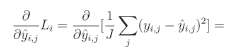

1​ divided by ​J​ (the number of outputs) is a constant and can be moved outside of the derivative. Since we are calculating the derivative with respect to the given output, ​j,​ the sum of one element equals this element:

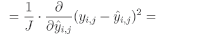

To calculate the partial derivative of an expression to the power of some value, we need to multiply this exponent by the expression, subtract 1 from the exponent, and multiply this by the partial derivative of the inner function:

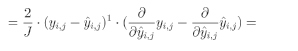


The partial derivative of the ground truth value with respect to the predicted value equals ​0​ since we treat other variables as constants. The partial derivative of the predicted value with respect to itself equals ​1​, which results in ​0-1=-1.​ This is multiplied by the rest of the equation and forms the solution:
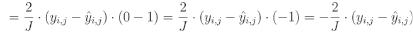

###  Solution
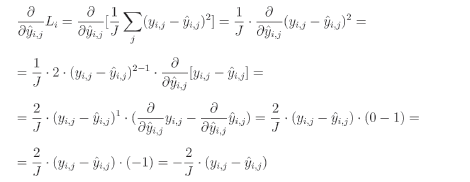

The partial derivative equals ​-2​, multiplied by the subtraction of the true and predicted values, and then divided by the number of outputs to normalize the gradients, making their magnitude invariant to the number of outputs.

### Mean Squared Error (MSE) Loss Code 

The code for MSE includes an implementation of the equation to calculate the sample loss from multiple outputs. ​axis=​ -​1​ with the mean calculation was explained in the previous chapter in detail and, in short words, it informs NumPy to calculate mean across outputs, for each sample separately. For the backward pass, we implemented the derivative equation, which results in ​-2 multiplied by the difference of true and predicted values, and normalized by the number of outputs. Similarly to the other loss function implementations, we also normalize gradients by the number of samples to make them invariant to the batch size, or the number of samples in general:

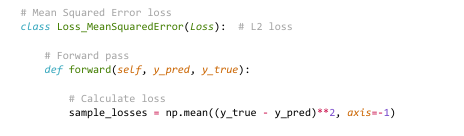

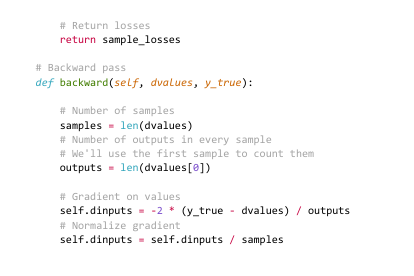

### Mean Absolute Error Loss 

With ​mean absolute error​, you take the absolute difference between the predicted and true values in a single output and average those absolute values.

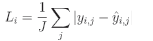

Where ​y​ means the target value, ​y-hat​ means predicted value, index ​i​ means the current sample, index ​j​ means the current output in this sample, and the ​J​ means the number of outputs. This function, used as a loss, penalizes the error linearly. It produces sparser results and is robust to outliers, which can be both advantageous and disadvantageous. In reality, L1 (MAE) loss is used less frequently than L2 (MSE) loss.

### Mean Absolute Error Loss Derivative 

The partial derivative for absolute error with respect to the predicted values is:
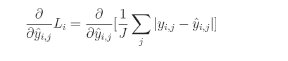
1​ divided by ​J​ (the number of outputs) is a constant, and can be moved outside of the derivative. Since we are calculating the derivative with respect to the given output, ​j,​ the sum of one element equals this element:

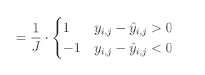

Full solution:

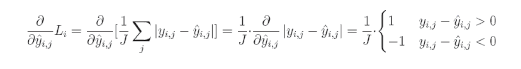

### Mean Absolute Error Loss Code 

The code for mean absolute error is very similar to the mean squared error. The forward pass includes NumPy’s ​np.abs()​ to calculate absolute values before calculating the mean. For the backward pass, we’ll use ​np.sign(),​ which returns 1 or -1 given the sign of the input and ​0​ if the parameter equals ​0,​ then normalize gradients by the number of samples to make them invariant to the batch size, or number of samples in general:

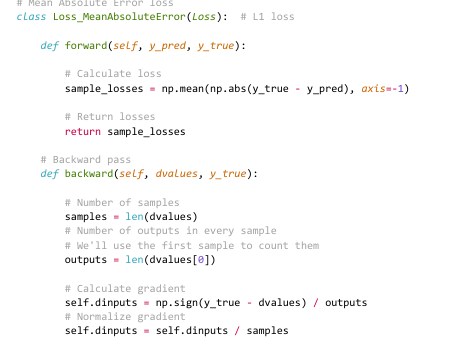



### Accuracy in Regression 

Now that we’ve got data, an activation function, and a loss calculation for regression, we’d like to measure performance. With cross-entropy, we were able to count the number of matches (situations where the prediction equals the ground truth target), and then divide it by the number of samples to measure the model’s accuracy. With a regression model, we have two problems: the first problem is that each output neuron in the model (there might be many) is a separate output ​—​ like in a binary regression model and unlike in a classifier, where all outputs contribute toward a common prediction. The second problem is that the prediction is a float value, and we can’t simply check if the output value equals the ground truth one, as it most likely won’t ​—​ if it differs even slightly, the accuracy will be a 0. For example, if your model predicts home prices and one of the samples has the target price of $192,500, and the predicted value is $192,495, then a pure “is it equal” assessment would return False. We’d likely consider the predicted price to be correct or “close enough” in this scenario, given the magnitude of the numbers in consideration. There’s no perfect way to show accuracy with regression. Still, it is preferable to have some accuracy metric. For example, Keras, a popular deep learning framework, shows both accuracy and loss for regression models, and we’ll also make our own accuracy metric. First, we need some “limit” value, which we’ll call “precision.” To calculate this precision, we’ll calculate the standard deviation from the ground truth target values and then divide it by ​250.​ This value can certainly vary depending on your goals. The larger the number you divide by, the more “strict” the accuracy metric will be. ​250​ is our value of choice. Code to represent this:

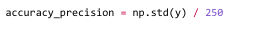

Then we could use this precision value as a sort of “cushion allowance” for regression outputs when comparing targets and predicted values for accuracy. We perform the comparison by applying the absolute value on the difference between the ground truth values and the predictions. Then we check if the difference is smaller than our previously calculated precision:
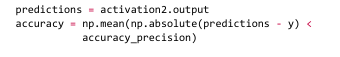

### Regression Model Training 

With this new activation function, loss, and way of calculating accuracy, we now create our model:

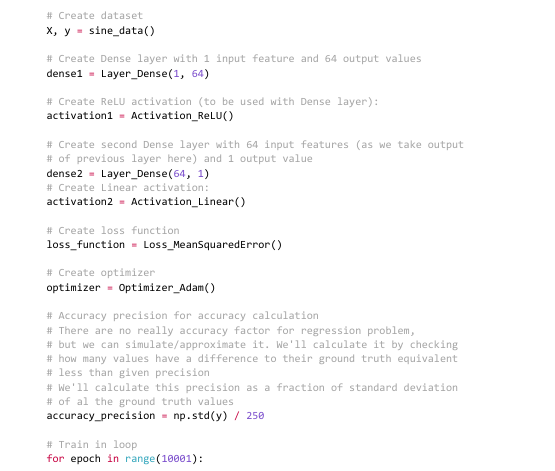

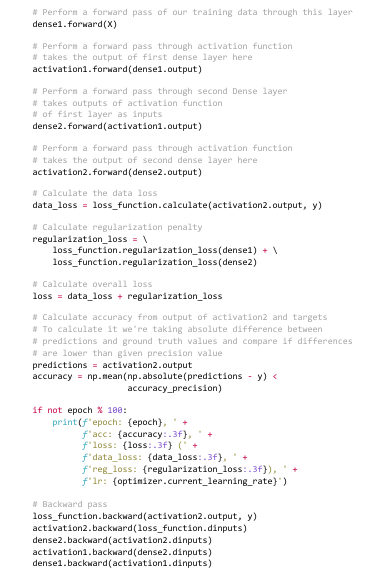

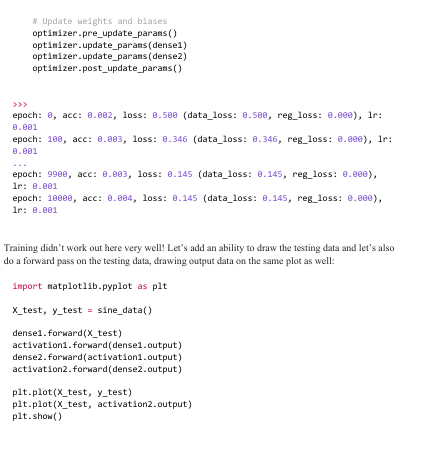

First, we are importing matplotlib, then creating a new set of data. Next, we have 4 lines of the code that are the same as the forward pass from our code above. We could call it a prediction or, in the context of what we are going to do, validation. We’ll cover both topics and explain what validation and prediction are in the future chapters. For now, it’s enough to know that what we are doing here is predicting on the same feature-set that we’ve used to train the model in order to see what the model learned and returns for our data — seeing how close outputs are to the training ground-true values. We are then plotting the training data, which are obviously a sine, and prediction data, what we’d hope to form a sine as well. Let’s run this code again and take a look at the generated image:
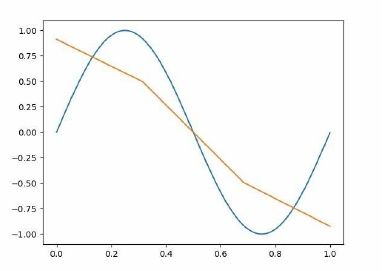

Figure 2:​ Model prediction - could not fit the sine data.
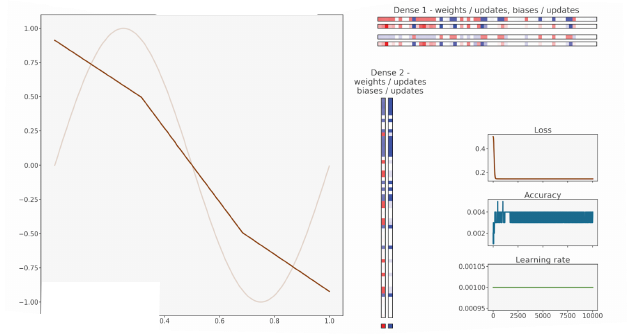

Figure 3:​ Model stoppped training immediately.
Recall the rectified linear activation function and how its nonlinear behavior allowed us to map nonlinear functions, but we also needed two or more hidden layers. In this case, we have only 1 hidden layer followed by the output layer. As we should know by now, this is simply not enough!

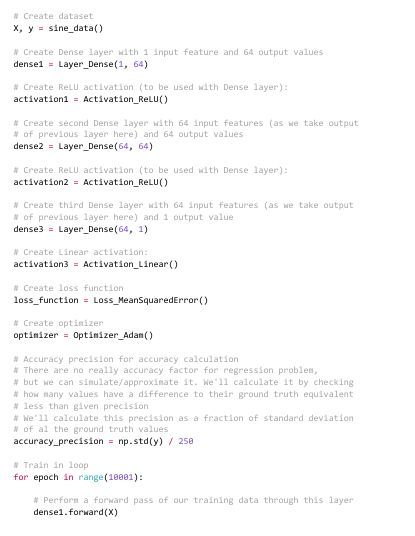
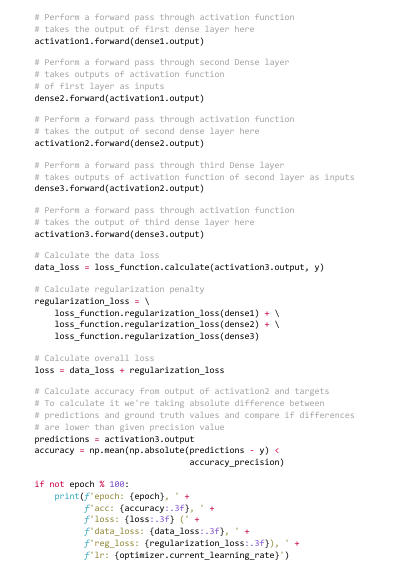


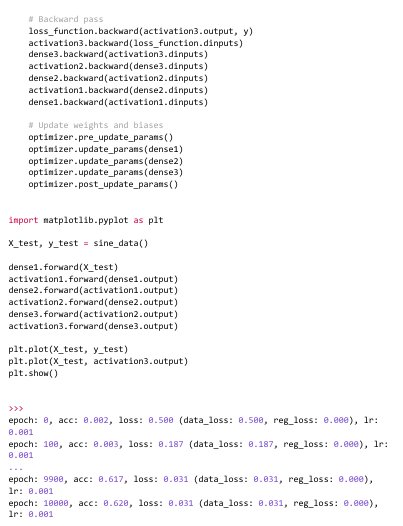

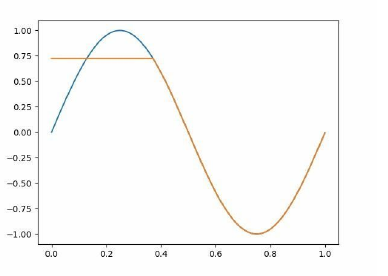.

Figure 4:​ Model prediction - better fit to the data.
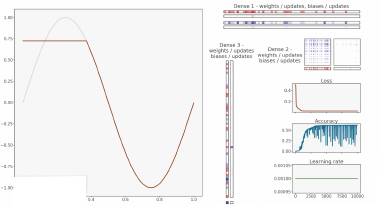

